In [1]:
#Importing the required modules

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, metrics, models, optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading the Fashion_Mnist dataset

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
#Normalize the data values between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
#Naming the classes in which the dataset is to be classified

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
#Selecting a sequential model

model = models.Sequential()

In [6]:
#Defining the structure of our Convolutional Neural Network

model.add(layers.Conv2D(64, (3, 3), activation= 'relu', input_shape = (28, 28, 1)))
model.add(layers.Conv2D(128, (3, 3), activation= 'relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(256, (3, 3), activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'Softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 64)                1638464   
                                                        

In [7]:
#Compiling the model with the selected optimizer and loss function

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [8]:
#Training the dataset

model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 220s 117ms/step - loss: 0.3809 - Accuracy: 0.8628
Epoch 2/5
1875/1875 [==============================] - 245s 131ms/step - loss: 0.2361 - Accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 247s 132ms/step - loss: 0.1853 - Accuracy: 0.9327
Epoch 4/5
1875/1875 [==============================] - 254s 136ms/step - loss: 0.1470 - Accuracy: 0.9453
Epoch 5/5
1875/1875 [==============================] - 232s 124ms/step - loss: 0.1140 - Accuracy: 0.9578


In [9]:
#Testing the accuracy of our model on the test dataset

(loss, accuracy) = model.evaluate(test_images, test_labels)
print("\nThe accuracy of the model on the test dataset is: " + str(round(accuracy * 100, 2)) + "%")

313/313 [==============================] - 9s 28ms/step - loss: 0.2521 - Accuracy: 0.9181

The accuracy of the model on the test dataset is: 91.81%


In [10]:
#Calculating probability of an image belonging to one of the 10 classes

pred_prob = model.predict(test_images)

313/313 [==============================] - 9s 28ms/step


In [11]:
#Storing the maximum probability predictions of all classes for all dataset elements

predictions = []

for i in range(len(pred_prob)):
    maximum = max(pred_prob[i])
    
    for j in range(len(pred_prob[i])):
        if pred_prob[i][j] == maximum:
            predictions.append(j)
            break

In [12]:
#Calculating the confusion matrix for our predicted values

confusion_matrix = confusion_matrix(test_labels, predictions)
print(confusion_matrix)

[[832   2  20  20   3   2 115   0   6   0]
 [  1 988   0   5   1   0   4   0   1   0]
 [  9   1 868   8  58   0  55   0   1   0]
 [ 11   3   9 927  29   1  19   0   1   0]
 [  0   0  29  17 927   0  26   0   1   0]
 [  0   0   0   0   0 989   0   9   0   2]
 [ 65   1  54  22 123   0 728   0   7   0]
 [  0   0   0   0   0   4   0 988   0   8]
 [  3   1   0   1   3   4   7   1 980   0]
 [  0   0   0   0   0   5   0  41   0 954]]


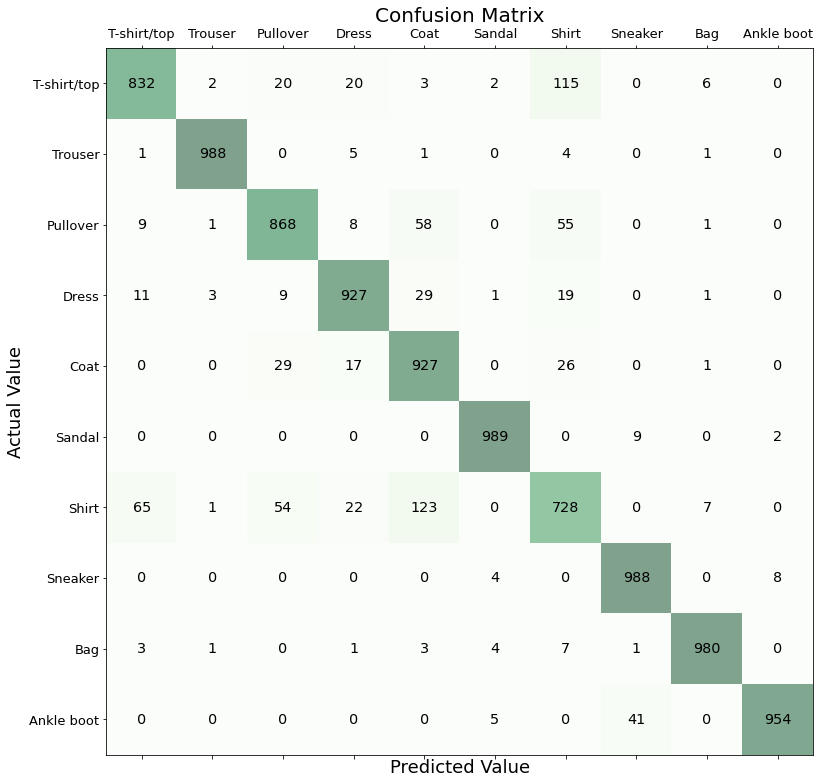

In [13]:
#Generating a plot to visualise the confusion matrix of the test dataset

fig, ax = plt.subplots(figsize = (13, 13))
ax.matshow(confusion_matrix, cmap = plt.cm.Greens, alpha = 0.5)

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x = j, y = i, s = confusion_matrix[i, j], va = 'center', ha = 'center', size = 'x-large')
        
plt.xlabel('Predicted Value', fontsize = 18)
plt.ylabel('Actual Value', fontsize = 18)
plt.xticks(ticks = range(10), labels = classes, fontsize = 13)
plt.yticks(ticks = range(10), labels = classes, fontsize = 13)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [14]:
#Printing the classification report of our test dataset

print(classification_report(test_labels, predictions, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.83      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.89      0.87      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.81      0.93      0.86      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.76      0.73      0.75      1000
     Sneaker       0.95      0.99      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

